# Online Payments Fraud Detection with Machine Learning

#### Introduction
Online payment systems has helped a lot in the ease of payments. But, at the same time, it increased in payment frauds. Online payment frauds can happen with anyone using any payment system, especially while making payments using a credit card. That is why detecting online payment fraud is very important for credit card companies to ensure that the customers are not getting charged for the products and services they never paid.

#### About Dataset
The dataset was collected from Kaggle and below are the columns from the datased:
1. step: represents a unit of time where 1 step equals 1 hour
2. type: type of online transaction
3. amount: the amount of the transaction
4. nameOrig: customer starting the transaction
5. oldbalanceOrg: balance before the transaction
6. newbalanceOrig: balance after the transaction
7. nameDest: recipient of the transaction
8. oldbalanceDest: initial balance of recipient before the transaction
9. newbalanceDest: the new balance of recipient after the transaction
10. isFraud: fraud transaction

#### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("C:/Users/bisht/Downloads/archive/PS_20174392719_1491204439457_log.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [2]:
# Checking for null values. And here there are no null values.
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [3]:
# Getting the total number of different transaction type in the dataset
df.type.value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

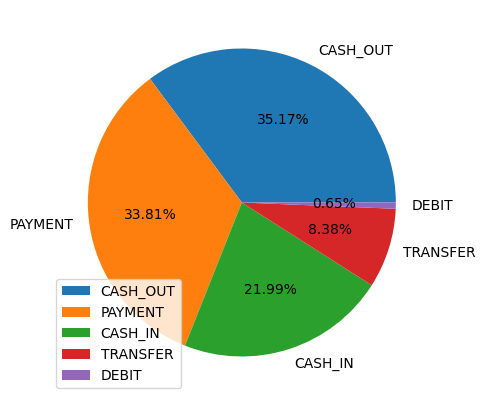

In [4]:
# Plotting a graph to know the percentage of transaction type in the dataset.
type = df['type'].value_counts()
transactions = type.index
quantity = type.values

import matplotlib.pyplot as plt
plt.figure(figsize = (5, 5))
plt.pie(data = df, x = quantity, labels = transactions, autopct='%.2f%%')
plt.legend(loc = 0)
plt.show()

In [5]:
# Checking for correlation between isFraud column and other features
df_encoded = pd.get_dummies(df, columns = ['type'], drop_first = True)
numeric_df = df_encoded.select_dtypes(include = ['number'])
numeric_df.corr()["isFraud"].sort_values(ascending=False) 

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64

In [6]:
# Mapping the type column so that we can use it to train the model
df["type"] = df["type"].map({"CASH_OUT": 1, "PAYMENT": 2, 
                                 "CASH_IN": 3, "TRANSFER": 4,
                                 "DEBIT": 5})
print(df.head())

   step  type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1     2   9839.64  C1231006815       170136.0       160296.36   
1     1     2   1864.28  C1666544295        21249.0        19384.72   
2     1     4    181.00  C1305486145          181.0            0.00   
3     1     1    181.00   C840083671          181.0            0.00   
4     1     2  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [7]:
# splitting the data using train_test_split into X and y variables
from sklearn.model_selection import train_test_split
X = np.array(df[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(df[["isFraud"]])

In [8]:
# training a machine learning model using a classification model to classify fraud and non-fraud 
# transactions and checking how it's score.
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.9997359578286932


In [9]:
# prediction = Classifying whether a transaction is a fraud [1] or not_fraud [0] using the model.
#features = [type, amount, oldbalanceOrg, newbalanceOrig]
features = np.array([[4, 9000.60, 9000.60, 0.0]])
prediction = model.predict(features)
print(prediction)

if prediction == 1:
    print('Fraud')
else:
    print('No Fraud')

[1]
Fraud
